In [1]:
#!pip install tqdm

In [1]:
import os
import pandas as pd
from tqdm import tqdm
from functools import reduce

In [2]:
os.listdir("trainTimeSeries/trainTimeSeries")

['TrainScores', 'TrainCandles', '.DS_Store']

In [3]:
def read_all_candles(folder):
    data = {}
    for file in tqdm(os.listdir(folder)):
        df = pd.read_csv(f"{folder}/{file}")
        df.columns = ["date", "close", "max", "min", "open"]
        df["date"] = pd.to_datetime(df['date'])
        df.set_index("date", inplace=True)
        name = file.replace("DARWINUniverseCandlesOHLC_", "").replace("_train.csv", "")
        data[name] = df
    return data

In [4]:
def read_all_scores(folder):
    scores = {}
    for file in tqdm(os.listdir(folder)):
        df = pd.read_csv(f"{folder}/{file}")
        name = file.replace("scoresData_", "").replace("_train.csv", "")
        scores[name] = df
    return scores

In [5]:

candle_data = read_all_candles("trainTimeSeries/trainTimeSeries/TrainCandles")

100%|██████████| 96/96 [00:04<00:00, 19.69it/s]


In [6]:
score_data = read_all_scores("trainTimeSeries/trainTimeSeries/TrainScores")

100%|██████████| 94/94 [00:01<00:00, 69.56it/s]


In [7]:
[k for k in candle_data if k not in score_data]

['MUF', 'MMY']

In [8]:
candle_data["MUF"].shape

(8610, 4)

In [9]:
candle_data["MMY"].shape

(6994, 4)

In [10]:
score_data.keys()

dict_keys(['GRU', 'TMF', 'THA', 'JTL', 'LWK', 'CIS', 'GGR', 'VRT', 'VVC', 'GRI', 'CBY', 'BAX', 'DIG', 'SHC', 'LWE', 'HEO', 'RAT', 'AWW', 'NYD', 'ZUJ', 'AUX', 'FFV', 'PME', 'ULT', 'DZF', 'ZAB', 'ZCD', 'USX', 'SBY', 'BFS', 'CSB', 'PHI', 'ERO', 'PEW', 'YAX', 'PPT', 'WFJ', 'FIR', 'HQU', 'TER', 'WWT', 'OXR', 'LHB', 'BOT', 'HZY', 'TXR', 'EEY', 'ERQ', 'LUG', 'NCT', 'UPP', 'BSX', 'FSK', 'ZXW', 'RWJ', 'TDD', 'YEC', 'AZG', 'HCC', 'UYZ', 'REU', 'SKN', 'PUL', 'ZTY', 'BZC', 'GFJ', 'SEH', 'ACY', 'TKT', 'UEI', 'MET', 'YFC', 'JHI', 'NSC', 'NWO', 'SRI', 'BGN', 'LEN', 'WXN', 'TRO', 'SKI', 'IDT', 'NYP', 'ULI', 'SYO', 'JNE', 'OJG', 'EOP', 'NVL', 'ZVQ', 'FNM', 'MCA', 'OOS', 'XRX'])

In [11]:
score_data["GRU"].head()

,eod_ts,Dp,Ex,Mc,Rs,Ra,Os,Cs,Rp,Rm,Dc,La,Pf,Cp,Ds,fcal_ts,lcal_ts
0,2019-01-04 22:00:00,0.000000,0.000000,0.0,10.0,8.507216,10.000000,10.0,0.0,0.0,0.0,0.0,9.938803,0.000000,0.297619,2019-01-05 00:00:00.000,2020-08-24 17:03:55.065
1,2019-01-07 22:00:00,0.055556,0.046296,0.0,10.0,8.507216,10.000000,10.0,0.0,0.0,0.0,0.0,9.219292,2.326375,0.592047,2019-01-08 00:00:00.000,2020-08-24 17:03:55.065
2,2019-01-08 22:00:00,0.055556,0.046296,0.0,10.0,8.507216,5.069444,10.0,0.0,0.0,0.0,0.0,8.694655,2.326375,0.889469,2019-01-09 00:00:00.000,2020-08-24 17:03:55.065
3,2019-01-09 22:00:00,0.055556,0.046296,0.0,10.0,8.507216,5.069444,10.0,0.0,0.0,0.0,0.0,7.377259,2.326375,1.178302,2019-01-10 00:00:00.000,2020-08-24 17:03:55.065
4,2019-01-10 22:00:00,0.031342,0.026119,0.0,10.0,5.043672,5.069444,10.0,0.0,0.0,0.0,0.0,9.219393,2.326375,1.487981,2019-01-11 00:00:00.000,2020-08-24 17:03:55.065


In [12]:
candle_data["MUF"].index

DatetimeIndex(['2018-12-19 01:00:00', '2018-12-19 02:00:00',
               '2018-12-19 03:00:00', '2018-12-19 04:00:00',
               '2018-12-19 05:00:00', '2018-12-19 06:00:00',
               '2018-12-19 07:00:00', '2018-12-19 08:00:00',
               '2018-12-19 09:00:00', '2018-12-19 10:00:00',
               ...
               '2020-06-17 14:00:00', '2020-06-17 15:00:00',
               '2020-06-17 16:00:00', '2020-06-17 17:00:00',
               '2020-06-17 18:00:00', '2020-06-17 19:00:00',
               '2020-06-17 20:00:00', '2020-06-17 21:00:00',
               '2020-06-17 22:00:00', '2020-06-17 23:00:00'],
              dtype='datetime64[ns]', name='date', length=8610, freq=None)

In [13]:
df = candle_data["MUF"]

In [14]:
df.resample("D").aggregate(["mean", "min", "max"]).columns

MultiIndex([('close', 'mean'),
            ('close',  'min'),
            ('close',  'max'),
            (  'max', 'mean'),
            (  'max',  'min'),
            (  'max',  'max'),
            (  'min', 'mean'),
            (  'min',  'min'),
            (  'min',  'max'),
            ( 'open', 'mean'),
            ( 'open',  'min'),
            ( 'open',  'max')],
           )

In [15]:
a = df.resample("D").aggregate(["mean", "min", "max"])

In [16]:
a["close", "mean"]

date
2018-12-19    113.396957
2018-12-20    113.765000
2018-12-21           NaN
2018-12-22           NaN
2018-12-23    113.710000
                 ...    
2020-06-13           NaN
2020-06-14    122.370000
2020-06-15    122.301250
2020-06-16    121.702083
2020-06-17    121.549583
Freq: D, Name: (close, mean), Length: 547, dtype: float64

In [17]:
df.resample("D").aggregate(["first", "last","min", "max"])["close", "first"].values

array([113.49, 113.73,    nan,    nan, 113.71,    nan,    nan, 113.71,
          nan,    nan,    nan,    nan,    nan,    nan, 113.63,    nan,
          nan,    nan,    nan,    nan, 110.94, 110.85, 109.94, 109.1 ,
          nan, 109.06, 109.43, 109.38, 109.83, 109.99,    nan,    nan,
       110.01, 109.89, 110.21, 110.47, 110.43, 109.49,    nan, 109.7 ,
       109.98, 110.25, 110.25, 110.34, 110.92,    nan, 111.23, 111.23,
       110.67, 110.63, 111.1 , 111.75,    nan,    nan, 112.12, 112.14,
       112.36, 112.75, 112.68,    nan, 111.64, 111.8 , 111.92, 112.36,
       112.49, 112.56,    nan, 113.72, 113.33, 113.12, 113.07, 113.13,
       113.3 ,    nan, 112.72, 113.18, 113.46, 112.34, 111.66, 112.07,
          nan, 112.21, 112.41, 112.67, 110.89, 110.83, 110.98,    nan,
       111.7 , 111.74, 111.41, 111.11, 110.85, 111.07,    nan, 111.06,
       110.94, 111.53, 112.2 , 112.1 , 112.28,    nan, 112.33, 112.38,
       112.2 , 111.52, 110.73, 111.07,    nan, 110.93, 111.42, 110.09,
      

In [18]:
def group_dates_df(df):
    df = df.resample("D").aggregate(["first", "last","min", "max"])
    newdf = pd.DataFrame({"date": df.index}).set_index("date")
    newdf["close"] = df["close", "last"].values
    newdf["low"] = df["min", "min"].values
    newdf["high"] = df["max", "max"].values
    newdf["open"] = df["open", "first"].values
    return newdf

In [19]:
candle_data = {k: group_dates_df(v) for k,v in tqdm(candle_data.items())}

100%|██████████| 96/96 [00:09<00:00, 10.37it/s]


In [20]:
candle_data.keys()

dict_keys(['ZVQ', 'NCT', 'YAX', 'OOS', 'GFJ', 'FIR', 'USX', 'FSK', 'TMF', 'TDD', 'HEO', 'ULT', 'CSB', 'CIS', 'UYZ', 'TRO', 'YEC', 'ERO', 'ZAB', 'HZY', 'MUF', 'ZTY', 'PUL', 'JHI', 'LWE', 'SEH', 'AWW', 'GRI', 'REU', 'ACY', 'MMY', 'VRT', 'ZXW', 'LUG', 'VVC', 'CBY', 'WFJ', 'PPT', 'PEW', 'MCA', 'IDT', 'FFV', 'LWK', 'ZCD', 'ULI', 'AUX', 'DZF', 'NWO', 'BAX', 'HCC', 'JNE', 'JTL', 'UPP', 'WXN', 'XRX', 'UEI', 'LHB', 'NYD', 'BGN', 'SHC', 'THA', 'TKT', 'GRU', 'BFS', 'SKN', 'NVL', 'YFC', 'GGR', 'TER', 'NYP', 'SBY', 'MET', 'SYO', 'HQU', 'BZC', 'OXR', 'EOP', 'ZUJ', 'SKI', 'NSC', 'BSX', 'LEN', 'PME', 'FNM', 'EEY', 'ERQ', 'AZG', 'OJG', 'WWT', 'BOT', 'TXR', 'RAT', 'DIG', 'SRI', 'PHI', 'RWJ'])

In [21]:
candle_data['ZVQ']

,close,low,high,open
date,,,,
2018-12-19,531.91,517.72,534.25,518.47
2018-12-20,531.91,531.91,531.91,531.91
2018-12-21,NaN,NaN,NaN,NaN
2018-12-22,NaN,NaN,NaN,NaN
2018-12-23,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-06-13,NaN,NaN,NaN,NaN
2020-06-14,565.39,565.39,565.39,565.39
2020-06-15,570.35,564.87,570.48,565.39


In [22]:
def create_prices_df(dfs_dict):
    dfs = []
    for asset in tqdm(dfs_dict):
        dfs_dict[asset].columns = [f"{asset}_{col}" if col != "date" else col for col in dfs_dict[asset].columns ]
        dfs.append(dfs_dict[asset][f"{asset}_close"])
    return reduce(lambda left, right: pd.merge(left, right, how="outer", on="date"), dfs)

In [23]:
prices_df = create_prices_df(candle_data)

100%|██████████| 96/96 [00:00<00:00, 1724.80it/s]


In [24]:
prices_df.head()

,ZVQ_close,NCT_close,YAX_close,OOS_close,GFJ_close,FIR_close,USX_close,FSK_close,TMF_close,TDD_close,...,AZG_close,OJG_close,WWT_close,BOT_close,TXR_close,RAT_close,DIG_close,SRI_close,PHI_close,RWJ_close
date,,,,,,,,,,,,,,,,,,,,,
2018-12-19,531.91,119.05,NaN,NaN,NaN,121.61,NaN,154.46,NaN,116.14,...,130.83,NaN,130.76,138.44,142.04,140.28,NaN,92.24,110.98,NaN
2018-12-20,531.91,119.47,NaN,NaN,NaN,121.61,NaN,156.63,NaN,117.09,...,131.67,NaN,132.69,140.03,141.87,140.28,NaN,92.18,110.98,NaN
2018-12-21,NaN,NaN,NaN,NaN,NaN,120.94,NaN,154.53,NaN,NaN,...,131.62,NaN,133.27,NaN,NaN,140.28,NaN,NaN,NaN,NaN
2018-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-23,NaN,119.47,NaN,NaN,NaN,121.37,NaN,155.15,NaN,NaN,...,NaN,NaN,133.30,140.69,141.84,NaN,NaN,NaN,110.98,NaN


In [34]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt import plotting

In [35]:
#!pip install matplotlib


In [27]:
mu = mean_historical_return(prices_df)
S = CovarianceShrinkage(prices_df).ledoit_wolf()


In [28]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()


In [29]:
cleaned_weights = ef.clean_weights()
#ef.save_weights_to_file("weights.txt")  # saves to file
print(cleaned_weights)

OrderedDict([('ZVQ_close', 0.00916), ('NCT_close', 0.00982), ('YAX_close', 0.04651), ('OOS_close', 0.00476), ('GFJ_close', 0.01321), ('FIR_close', 0.01499), ('USX_close', 0.02027), ('FSK_close', 0.0), ('TMF_close', 0.02949), ('TDD_close', 0.0075), ('HEO_close', 0.0139), ('ULT_close', 0.03112), ('CSB_close', 0.00182), ('CIS_close', 0.03518), ('UYZ_close', 0.01889), ('TRO_close', 0.01609), ('YEC_close', 0.0), ('ERO_close', 0.0), ('ZAB_close', 0.00771), ('HZY_close', 0.0), ('MUF_close', 0.0), ('ZTY_close', 0.0), ('PUL_close', 0.01393), ('JHI_close', 0.01554), ('LWE_close', 0.00309), ('SEH_close', 0.00505), ('AWW_close', 0.02446), ('GRI_close', 0.00501), ('REU_close', 0.0), ('ACY_close', 0.0), ('MMY_close', 0.0), ('VRT_close', 0.00482), ('ZXW_close', 0.0095), ('LUG_close', 0.01741), ('VVC_close', 0.0), ('CBY_close', 0.0127), ('WFJ_close', 0.0024), ('PPT_close', 0.0), ('PEW_close', 0.00644), ('MCA_close', 0.01258), ('IDT_close', 0.0), ('FFV_close', 0.01825), ('LWK_close', 0.01926), ('ZCD_cl

In [49]:
sum(cleaned_weights.values())

0.9999800000000002

In [30]:
ef.portfolio_performance(verbose=True)

Expected annual return: 14.7%
Annual volatility: 1.4%
Sharpe Ratio: 8.97


(0.1468522661090071, 0.01413972711937935, 8.971337638839467)

In [31]:
#ef = EfficientFrontier(mu, S, weight_bounds=(None, None))

In [38]:
import numpy as np
#risk_range = np.linspace(0.10, 0.40, 100)
#ax = plotting.plot_efficient_frontier(ef, ef_param="risk", ef_param_range=risk_range,
#                           show_assets=True, showfig=True)


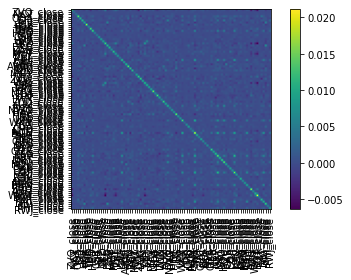

<AxesSubplot:>

In [39]:
plotting.plot_covariance(S,submission)

In [51]:
def _fix_weights(weights):
    max_weight_asset = list(sorted(weights, key=weights.get, reverse=True))[0]
    falta = 1 - sum(weights.values())
    weights[max_weight_asset] += falta
    assert sum(weights.values()) == 1
    return weights

In [52]:
def get_submission(weights, assets):
    weights = _fix_weights(weights)
    subm_plantilla = pd.read_csv("./submission/submission.csv")
    date = subm_plantilla["eod_ts"]
    cols = {
        f"allo_{asset}": [weights[f"{asset}_close"]]*len(date)
        for asset in assets
    }
    return pd.DataFrame({"eod_ts": date, **cols})

In [2]:
submission = get_submission(weights, candle_data.keys())

NameError: name 'get_submission' is not defined

NameError: name 'submission' is not defined

In [55]:
submission.to_csv("submission_0102.csv", header=True, index=False)